Bandwidth factor: 0.35495366597555705
Covariance matrix:
 [[1.41040240e-04 1.70529127e-02]
 [1.70529127e-02 2.60047048e+00]]


Text(0.5, 1.0, 'Joint Density of $(\\alpha, k)$ using Gaussian KDE, $h$=0.3550')

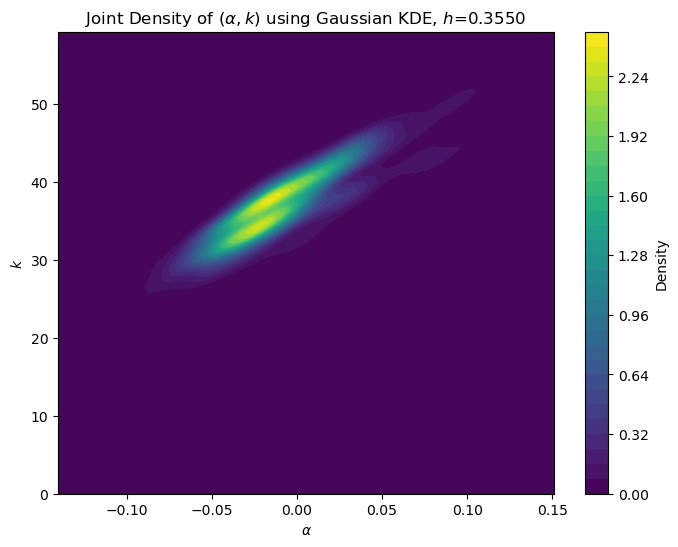

In [18]:
from scipy.stats import gaussian_kde

df = pd.read_csv("drucker_prager_params.csv")

data = np.vstack([df["alpha"], df["k"]])  # shape (2, N)
kde = gaussian_kde(data, bw_method='scott')

print("Bandwidth factor:", kde.factor)
print("Covariance matrix:\n", kde.covariance)
bandwidth_matrix = kde.factor ** 2 * np.cov(data)

alpha_grid = np.linspace(min(df["alpha"]) - 0.01, max(df["alpha"]) + 0.01, 100)
k_grid = np.linspace(0, max(df["k"]) + 5, 100)  # ensure k > 0
A, K = np.meshgrid(alpha_grid, k_grid)

# Flatten and stack grid for KDE evaluation
coords = np.vstack([A.ravel(), K.ravel()])
Z = kde(coords).reshape(A.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(A, K, Z, levels=30, cmap='viridis')
# plt.scatter(df["alpha"], df["k"], s=10, c='white', alpha=0.6)
plt.colorbar(label='Density')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$k$')
plt.title(rf'Joint Density of $(\alpha, k)$ using Gaussian KDE, $h$={kde.factor:.4f}')


In [233]:
from copulas.univariate import BetaUnivariate, GammaUnivariate
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_2d
import pandas as pd

df = pd.read_csv("drucker_prager_params.csv")
data = df.drop(columns="Seed")

dist = GaussianMultivariate(distribution={
    "alpha": BetaUnivariate(),
    "k": GammaUnivariate()
})

dist.fit(data)
sampled = dist.sample(1000)

compare_2d(data, sampled)

/home/avb25/miniconda3/envs/lammps/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:795: RuntimeWarning:

invalid value encountered in sqrt

/home/avb25/miniconda3/envs/lammps/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:800: RuntimeWarning:

The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.



In [6]:
from copulas.univariate import BetaUnivariate, GammaUnivariate
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_1d
from copulas.visualization import compare_2d
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("drucker_prager_params.csv")
data = df.drop(columns="Seed")

alpha_lower = -np.sqrt(3)/3
alpha_upper = np.sqrt(3)/3

# Rescale alpha to [0,1]
data_scaled = data.copy()
data_scaled["alpha"] = np.clip((data["alpha"] - alpha_lower) / (alpha_upper - alpha_lower), 0.01, 0.99)
print(np.sort(data_scaled["alpha"]))

# Fit copula with scaled alpha
dist = GaussianMultivariate(distribution={
    "alpha": BetaUnivariate(),
    "k": GammaUnivariate()
})

dist.fit(data_scaled)
sampled_scaled = dist.sample(1000)
print(np.sort(sampled_scaled["alpha"]))

# Unscale alpha back to original domain
sampled = sampled_scaled.copy()
sampled["alpha"] = sampled_scaled["alpha"] * (alpha_upper - alpha_lower) + alpha_lower

unscaled_beginning_data = data_scaled.copy()
unscaled_beginning_data["alpha"] = unscaled_beginning_data["alpha"] * (alpha_upper - alpha_lower) + alpha_lower

# Visual comparison
fig = compare_2d(unscaled_beginning_data, sampled)
fig.show()
fig = compare_1d(unscaled_beginning_data["alpha"], sampled["alpha"])
fig.show()
fig = compare_1d(unscaled_beginning_data["k"], sampled["k"])
fig.show()

[0.38709853 0.41601575 0.43174239 0.43254483 0.43394383 0.43456885
 0.43933259 0.4400307  0.44339938 0.44510208 0.44517943 0.44749801
 0.4477124  0.44853505 0.44906927 0.45107753 0.451532   0.45230387
 0.45252926 0.453258   0.45425383 0.45476924 0.45536041 0.45545566
 0.45549181 0.45667059 0.45685291 0.45713026 0.45715085 0.45726574
 0.45848774 0.45898867 0.45912518 0.45919663 0.45925501 0.45930026
 0.45932841 0.45938871 0.45943013 0.45960545 0.45989254 0.46006949
 0.46068015 0.46079787 0.46086268 0.4612054  0.46121267 0.46127267
 0.4614158  0.46154995 0.46160992 0.4616597  0.46202415 0.46218017
 0.46220027 0.4623268  0.46259908 0.46286637 0.46314471 0.4632764
 0.46334388 0.46335068 0.46355704 0.46399034 0.46405207 0.4640655
 0.46409565 0.4641967  0.46426777 0.46428446 0.46465999 0.46475164
 0.46536017 0.46560766 0.46607761 0.46615413 0.46635013 0.46639078
 0.4664158  0.46659251 0.46666351 0.46689527 0.46707943 0.46747794
 0.46749816 0.46760662 0.46774432 0.46783651 0.46796223 0.468130

/home/avb25/miniconda3/envs/lammps/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:795: RuntimeWarning:

invalid value encountered in sqrt

/home/avb25/miniconda3/envs/lammps/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:800: RuntimeWarning:

The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.



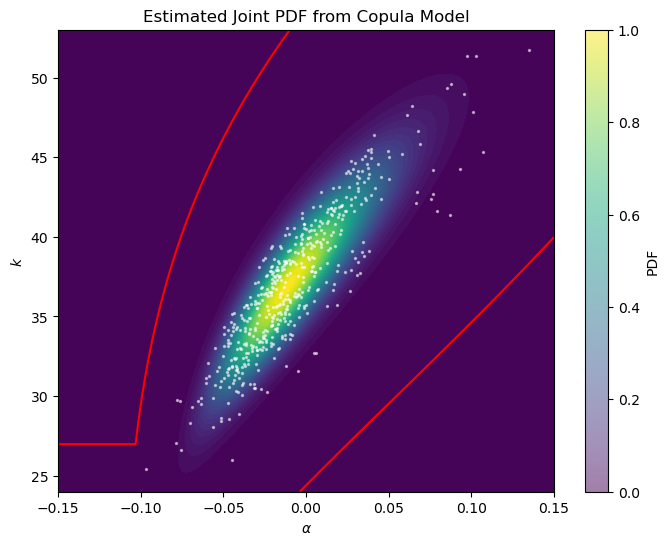

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define physical ranges
x = np.linspace(-0.15, 0.15, 1000)
y = np.linspace(24, 53, 1000)
X, Y = np.meshgrid(x, y)

# Flatten grid into DataFrame (and scale alpha)
grid = pd.DataFrame({
    "alpha": np.clip((X.ravel() - alpha_lower) / (alpha_upper - alpha_lower), 0.01, 0.99),
    "k": Y.ravel()
})

# Evaluate PDF from copula model (returns array)
Z = dist.probability_density(grid)
Z = Z.reshape(X.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap="viridis", levels=50)
plt.contour(X, Y, Z, levels=[1e-12], colors='red', linewidths=1.5)
plt.scatter(unscaled_beginning_data["alpha"], unscaled_beginning_data["k"], c='white', s=2, alpha=0.5)
plt.ylim(24, 53)
plt.xlim(-0.15, 0.15)

plt.colorbar(label='PDF')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$k$")
plt.title("Estimated Joint PDF from Copula Model")
plt.show()


{'loc': 0.4027085970941342, 'scale': 0.678505045875141, 'a': 8.895296382299453, 'b': 57.89176603782375, 'type': 'copulas.univariate.beta.BetaUnivariate'}


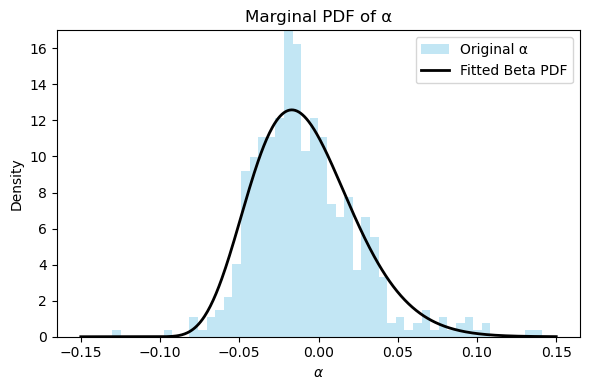

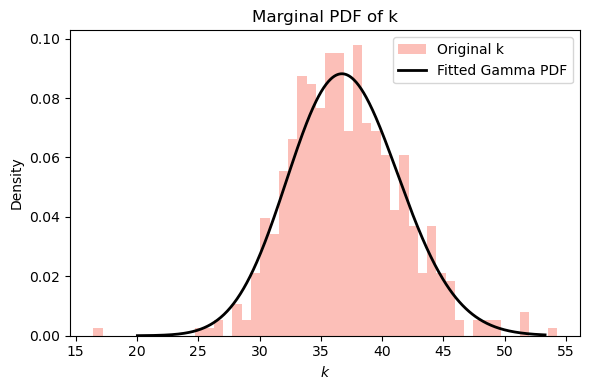

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, gamma
from copulas.univariate import BetaUnivariate, GammaUnivariate
from scipy.stats import beta as beta_dist, gamma as gamma_dist


# Manually fit marginals on scaled data
alpha_scaled = data_scaled["alpha"].values
k_data = data_scaled["k"].values

data_clipped = data_scaled.copy()
data_clipped["alpha"] = data_clipped["alpha"] * (alpha_upper - alpha_lower) + alpha_lower

beta_uni = BetaUnivariate()
beta_uni.fit(alpha_scaled)
beta_params = beta_uni.to_dict()  # {'a': a, 'b': b}

gamma_uni = GammaUnivariate()
gamma_uni.fit(k_data)
gamma_params = gamma_uni.to_dict()  # {'alpha': shape, 'beta': rate}
print(beta_params)



# 1. Plot alpha
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(data_clipped["alpha"], bins=50, density=True, alpha=0.5,
         label="Original α", color="skyblue")

x_plot = np.linspace(-0.15, 0.15, 500)

# Convert to unit space (to match original fitted domain)
x_scaled = (x_plot - alpha_lower) / (alpha_upper - alpha_lower)

bp = beta_params
gp = gamma_params

# Evaluate fitted Beta PDF with loc/scale
pdf_alpha = beta_dist.pdf(
    x_scaled,
    a=bp["a"],
    b=bp["b"],
    loc=bp["loc"],
    scale=bp["scale"]
) / (alpha_upper - alpha_lower)  # Chain rule rescaling from unit space

plt.plot(x_plot, pdf_alpha, label="Fitted Beta PDF", color="black", lw=2)
# plt.plot([0.1, 0.1], [0, 18], color='red', linestyle='--', label='Cutoff')
plt.xlabel(r"$\alpha$")
plt.ylim(0, 17)
plt.ylabel("Density")
plt.title("Marginal PDF of α")
plt.legend()
plt.tight_layout()

# 2. Plot k
fig, ax = plt.subplots(figsize=(6, 4))
plt.hist(data_clipped["k"], bins=50, density=True, alpha=0.5,
         label="Original k", color="salmon")

x_k = np.linspace(min(sampled["k"]), max(sampled["k"]), 500)

# Evaluate fitted Gamma PDF with loc/scale
pdf_k = gamma_dist.pdf(
    x_k,
    a=gp["a"],
    loc=gp["loc"],
    scale=gp["scale"]
)

plt.plot(x_k, pdf_k, label="Fitted Gamma PDF", color="black", lw=2)
plt.xlabel(r"$k$")
plt.ylabel("Density")
plt.title("Marginal PDF of k")
plt.legend()
plt.tight_layout()

plt.show()


In [2]:
from copulas.univariate import BetaUnivariate, GammaUnivariate
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_1d
from copulas.visualization import compare_2d
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("drucker_prager_params.csv")
data = df.drop(columns="Seed")

alpha_lower = -np.sqrt(3)/3
alpha_upper = 0.1

# Rescale alpha to [0,1]
data_scaled = data.copy()
data_scaled["alpha"] = np.clip((data["alpha"] - alpha_lower) / (alpha_upper - alpha_lower), 0.01, 0.99)
# print(np.sort(data_scaled["alpha"]))

# Fit copula with scaled alpha
dist = BetaUnivariate()

dist.fit(data_scaled["alpha"])
sampled_scaled = dist.sample(1000)

# Unscale alpha back to original domain
sampled = sampled_scaled.copy()
sampled = sampled_scaled * (alpha_upper - alpha_lower) + alpha_lower

print("sampled")
print(np.sort(sampled))


fig = compare_1d(data["alpha"], sampled)
fig.show()


sampled
[-8.35934029e-02 -8.25814237e-02 -8.02059864e-02 -7.94694737e-02
 -7.84982511e-02 -7.82984190e-02 -7.82676464e-02 -7.73004548e-02
 -7.70762249e-02 -7.61759648e-02 -7.58177467e-02 -7.49105836e-02
 -7.42281501e-02 -7.26271446e-02 -7.16010855e-02 -7.10707785e-02
 -7.03932362e-02 -6.81266168e-02 -6.78558415e-02 -6.74511270e-02
 -6.64194052e-02 -6.62210150e-02 -6.61470413e-02 -6.57423897e-02
 -6.56387299e-02 -6.52075061e-02 -6.52050376e-02 -6.50444719e-02
 -6.49464322e-02 -6.48882563e-02 -6.40849042e-02 -6.40845733e-02
 -6.39570782e-02 -6.37605403e-02 -6.36541469e-02 -6.26568955e-02
 -6.21317709e-02 -6.14892102e-02 -6.11699500e-02 -6.11329695e-02
 -6.02902921e-02 -5.97296970e-02 -5.91510117e-02 -5.91476309e-02
 -5.88157205e-02 -5.83947901e-02 -5.83929707e-02 -5.82801840e-02
 -5.76068858e-02 -5.75697532e-02 -5.75425868e-02 -5.72777476e-02
 -5.68681564e-02 -5.68571875e-02 -5.68499554e-02 -5.66614317e-02
 -5.65984429e-02 -5.65386657e-02 -5.65178091e-02 -5.60007661e-02
 -5.58124453e-02 

/home/avb25/miniconda3/envs/lammps/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:795: RuntimeWarning:

invalid value encountered in sqrt

/home/avb25/miniconda3/envs/lammps/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:800: RuntimeWarning:

The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.

